In [1]:
# Libraries
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sqlalchemy import create_engine
import statistics
import os
from scipy import stats
import scipy.stats 
import re
from bs4 import BeautifulSoup
import requests

In [3]:
df=pd.read_csv('olympics_dataset.csv')

In [ ]:
df.NOC='GBR'

In [29]:
s=df.NOC.unique()
s

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [8]:
df.shape

(271116, 15)

In [32]:
df=df[df.Team=='Great Britain']

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11330 entries, 785 to 270011
Data columns (total 15 columns):
ID        11330 non-null int64
Name      11330 non-null object
Sex       11330 non-null object
Age       11330 non-null float64
Height    7661 non-null float64
Weight    7568 non-null float64
Team      11330 non-null object
NOC       11330 non-null object
Games     11330 non-null object
Year      11330 non-null int64
Season    11330 non-null object
City      11330 non-null object
Sport     11330 non-null object
Event     11330 non-null object
Medal     11330 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 1.4+ MB


In [58]:
df.Medal.fillna('no_medal',inplace=True)

/Users/kforster/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [67]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
785,453,Leslie Ablett,M,24.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Water Polo,Water Polo Men's Water Polo,no_medal
786,453,Leslie Ablett,M,32.0,NaN,NaN,Great Britain,GBR,1936 Summer,1936,Summer,Berlin,Water Polo,Water Polo Men's Water Polo,no_medal
888,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Backstroke,no_medal
889,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 100 metres Medley Relay,no_medal
890,509,Gary Abraham,M,21.0,175.0,64.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Backstroke,no_medal
891,509,Gary Abraham,M,21.0,175.0,64.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,no_medal
892,509,Gary Abraham,M,21.0,175.0,64.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Bronze
911,519,Harold Maurice Abrahams,M,20.0,183.0,75.0,Great Britain,GBR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 100 metres,no_medal
912,519,Harold Maurice Abrahams,M,20.0,183.0,75.0,Great Britain,GBR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 200 metres,no_medal
913,519,Harold Maurice Abrahams,M,20.0,183.0,75.0,Great Britain,GBR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 4 x 100 metres Relay,no_medal


In [77]:
df_10=df[df.Age>10]

In [89]:
df_102=df_10[df_10.Age.notnull()]
mean_age=df_102.Age.mean()

In [90]:
df.Age.fillna(mean_age,inplace=True)

/Users/kforster/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a36139080>,
 'caps': [<matplotlib.lines.Line2D at 0x1a32cb6ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a31f7e0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a32cb6eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a32ca7278>],
 'means': []}

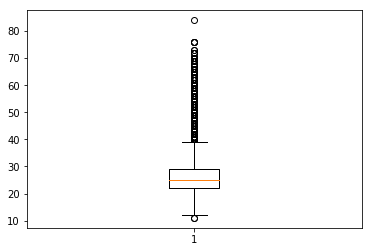

In [92]:
fig,ax=plt.subplots()
ax.boxplot(df.Age)

In [98]:
df=df[df.Age<65]

In [101]:
df.Age.max()

64.0

In [37]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [53]:
df.groupby(['Year','Medal']).agg({'ID':'count'})

ID
Year Medal     
1896 Bronze   2
     Gold     2
     Silver   3
1900 Bronze   7
     Gold     9
     Silver   6
1904 Gold     1
     Silver   1
1906 Bronze   8
     Gold     9
     Silver  14
1908 Bronze  34
     Gold    69
     Silver  64
1912 Bronze  57
     Gold    36
     Silver  35
1920 Bronze  15
     Gold    46
     Silver  40
1924 Bronze  28
     Gold    31
     Silver  23
1928 Bronze  25
     Gold     7
     Silver  27
1932 Bronze  14
     Gold     9
     Silver  10
1936 Bronze  11
...          ..
1992 Bronze  39
     Gold     8
     Silver   3
1994 Bronze   3
1996 Bronze   9
     Gold     2
     Silver  15
1998 Bronze   4
2000 Bronze  10
     Gold    22
     Silver  20
2002 Bronze   1
     Gold     5
2004 Bronze  15
     Gold    17
     Silver  23
2006 Silver   1
2008 Bronze  25
     Gold    31
     Silver  25
2010 Gold     1
2012 Bronze  48
     Gold    46
     Silver  28
2014 Bronze   5
     Gold     1
     Silver   4
2016 Bronze  26
     Gold    64
     Silver  55

[95 rows x 1 columns]

In [107]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11330 entries, 785 to 270011
Data columns (total 15 columns):
ID        11330 non-null int64
Name      11330 non-null object
Sex       11330 non-null object
Age       11330 non-null int64
Height    7661 non-null float64
Weight    7568 non-null float64
Team      11330 non-null object
NOC       11330 non-null object
Games     11330 non-null object
Year      11330 non-null int64
Season    11330 non-null object
City      11330 non-null object
Sport     11330 non-null object
Event     11330 non-null object
Medal     11330 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 1.4+ MB


In [113]:
df=df.astype({'Age':'int64'})
df=df.astype({'Year':'object'})


In [112]:
df.describe()

,ID,Age,Height,Weight,Year
count,11330.000000,11330.000000,7661.000000,7568.000000,11330.000000
mean,65945.471050,26.444572,175.647435,70.447674,1967.212357
std,39674.410705,7.296367,10.286641,13.188578,34.182424
min,453.000000,11.000000,137.000000,35.000000,1896.000000
25%,29820.250000,22.000000,169.000000,62.000000,1936.000000
50%,66494.000000,25.000000,175.000000,70.000000,1972.000000
75%,99892.000000,29.000000,183.000000,78.000000,1996.000000
max,135080.000000,64.000000,211.000000,160.000000,2016.000000


In [126]:
df.pivot_table(index=["Sport"], values='Name', columns=['Medal'], aggfunc={'Name':'count'},fill_value=0).sort_values(by='Bronze', ascending=False)

Medal,Bronze,Gold,Silver,no_medal
Sport,,,,
Athletics,127,74,133,1906
Hockey,60,46,12,259
Cycling,55,59,55,413
Swimming,55,23,49,1164
Gymnastics,46,2,3,1076
Rowing,33,85,99,437
Shooting,28,23,36,371
Boxing,25,18,13,168
Equestrianism,23,26,34,287


In [121]:
df.pivot_table(index=["Sport"], values='Name', columns=['Year','Medal'], aggfunc={'Name':'count'},fill_value=0)

Year                        1896                        1900              \
Medal                     Bronze Gold Silver no_medal Bronze Gold Silver   
Sport                                                                      
Alpine Skiing                  0    0      0        0      0    0      0   
Alpinism                       0    0      0        0      0    0      0   
Archery                        0    0      0        0      0    0      0   
Art Competitions               0    0      0        0      0    0      0   
Athletics                      1    0      1        5      2    3      3   
Badminton                      0    0      0        0      0    0      0   
Basketball                     0    0      0        0      0    0      0   
Beach Volleyball               0    0      0        0      0    0      0   
Biathlon                       0    0      0        0      0    0      0   
Bobsleigh                      0    0      0        0      0    0      0   
Boxing                         0    0      0        0      0    0      0   
Canoeing                       0    0      0        0      0    0      0   
Cross Country Skiing           0    0      0        0      0    0      0   
Curling                        0    0      0        0      0    0      0   
Cycling                        1    0      1        3      0    0      1   
Diving                         0    0      0        0      0    0      0   
Equestrianism                  0    0      0        0      0    0      0   
Fencing                        0    0      0        0      0    0      0   
Figure Skating                 0    0      0        0      0    0      0   
Football                       0    0      0        0      0    0      0   
Freestyle Skiing               0    0      0        0      0    0      0   
Golf                           0    0      0        0      1    0      1   
Gymnastics                     0    0      0        1      0    0      0   
Handball                       0    0      0        0      0    0      0   
Hockey                         0    0      0        0      0    0      0   
Ice Hockey                     0    0      0        0      0    0      0   
Jeu De Paume                   0    0      0        0      0    0      0   
Judo                           0    0      0        0      0    0      0   
Lacrosse                       0    0      0        0      0    0      0   
Luge                           0    0      0        0      0    0      0   
Modern Pentathlon              0    0      0        0      0    0      0   
Nordic Combined                0    0      0        0      0    0      0   
Polo                           0    0      0        0      0    0      0   
Racquets                       0    0      0        0      0    0      0   
Rhythmic Gymnastics            0    0      0        0      0    0      0   
Rowing                         0    0      0        0      1    0      0   
Rugby Sevens                   0    0      0        0      0    0      0   
Sailing                        0    0      0        0      0    0      0   
Shooting                       0    0      0        5      0    0      0   
Short Track Speed Skating      0    0      0        0      0    0      0   
Skeleton                       0    0      0        0      0    0      0   
Ski Jumping                    0    0      0        0      0    0      0   
Snowboarding                   0    0      0        0      0    0      0   
Speed Skating                  0    0      0        0      0    0      0   
Swimming                       0    0      0        0      1    2      0   
Synchronized Swimming          0    0      0        0      0    0      0   
Table Tennis                   0    0      0        0      0    0      0   
Taekwondo                      0    0      0        0      0    0      0   
Tennis                         0    1      0        1      2    4      1   
Trampolining                   0    0      0    

In [127]:
df.to_json('athletes.json', orient = 'records')